In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import os
import h5py
import pickle

Data import from given ROOT file...
Read file into a pandas dataframe

In [3]:
import pandas as pd
import math
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras.optimizers import adam
%matplotlib inline
import random
import pandas, numpy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
# this wrapper makes it possible to train on subset of features
import sklearn
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
# import xgboost as xgb
from itertools import tee, islice
from ROOT import TFile, TCanvas, TPad, TPaveLabel, TPaveText, TTree, TH1F, TF1
from root_numpy import root2array, tree2array, array2tree, array2root
import sys
from ROOT import gROOT, AddressOf
from root_numpy import root2array, rec2array
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.ticker as ticker
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import tree

Using TensorFlow backend.


Welcome to JupyROOT 6.16/00


In [4]:
signal = '/afs/cern.ch/user/s/sraj/public/data_folder/output_TprimeBToTH_Hgg_M-600_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
back_1 = '/afs/cern.ch/user/s/sraj/public/data_folder/signal.root'
back_2 = '/afs/cern.ch/user/s/sraj/public/data_folder/back.root'
back_3 = '/afs/cern.ch/user/s/sraj/public/data_folder/output_TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8.root'
# out_dir = '/afs/cern.ch/user/s/sraj/public/plot'
#Calling out the folder in which the data is stored
treeName_back_1 ="tagsDumper/trees/tth_125_13TeV_THQLeptonicTag" 
treeName_back_2 ="tagsDumper/trees/thq_125_13TeV_THQLeptonicTag" 
treeName_back_3 ="tagsDumper/trees/ttgg_13TeV_THQLeptonicTag" 
treeName_signal = "tagsDumper/trees/Tprime_600_13TeV_THQLeptonicTag"
columns = ['dipho_pt',
           'dipho_phi',
           'dipho_eta',
           'dipho_e',
           'dipho_mass',
           'dipho_leadPt',
           'dipho_leadEt',
           'dipho_leadEta',
           'dipho_leadPhi',
           'dipho_subleadEta',
           'bjet1_pt',
           'bjet2_pt',
           'bjet1_eta',
           'bjet2_eta',
           'jet1_pt',
           'jet2_pt',
           'jet1_eta',
           'n_jets',
           'n_bjets',
           'bjet2_phi',
           'bjet3_phi',
#            'bjet3_eta',
           'bjet1_discr',
           'bjet2_discr',
           'bjet3_discr',
           'jet3_pt',
#           'jet1_phi',
#          'jet2_phi' ,
          'jet3_phi',
          'jet1_e',
          'jet2_e',
          'jet3_e',
#            'CMS_hgg_mass',
#             'sigmaMoM_decorr',
#             'dipho_sumpt',
#             'dipho_cosphi',
# #             'dipho_mass',
#             'dipho_lead_ptoM',
#             'ele1_pt',
#             'ele2_pt',
#             'ele1_eta',
#             'ele2_eta',
#             'ele1_phi',
#             'ele2_phi',
#             'ele1_e',
#             'ele2_e',
#             'ele1_ch',
#             'ele2_ch',
          ]


#Data is converted to array
mc_arr = root2array(signal, treeName_signal, columns)
data_arr_1 = root2array(back_1, treeName_back_1, columns)
data_arr_2 = root2array(back_2, treeName_back_2, columns)
data_arr_3 = root2array(back_3, treeName_back_3, columns)

# data_arr= np.concatenate(( data_arr_1, data_arr_2, data_arr_3),axis =0)
# data_arr= np.concatenate(( data_arr_2, data_arr_3),axis =0)

# signal_array = rec2array(mc_arr)
# # backgr_array = rec2array(data_arr)

# backgr_array_1 = rec2array(data_arr_1)
# backgr_array_2 = rec2array(data_arr_2)
# backgr_array_3 = rec2array(data_arr_3)


In [5]:
signal = pd.DataFrame(mc_arr)
backgr_1 = pd.DataFrame(data_arr_1)
backgr_2 = pd.DataFrame(data_arr_2)
backgr_3 = pd.DataFrame(data_arr_3)
# backgr =pd.DataFrame(backgr_array)

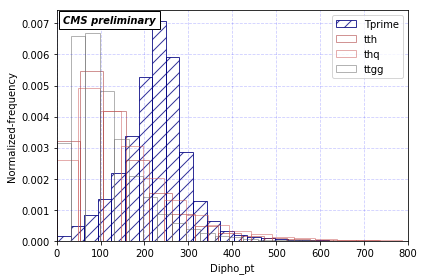

In [36]:
#plot for all
from matplotlib import pyplot
k= signal['dipho_pt']
kb_1 = backgr_1['dipho_pt']
kb_2 = backgr_2['dipho_pt']
kb_3 = backgr_3['dipho_pt']
plt.hist(k, bins=40, alpha = 0.8,color='b', label='Tprime', density= True, fill= False, edgecolor='navy',hatch='//')
plt.hist(kb_1, bins=40, alpha = 0.5,color='r' ,label='tth', density= True, fill = False, edgecolor = 'brown')
plt.hist(kb_2, bins=40, alpha = 0.5,color='g' ,label='thq', density= True, fill = False, edgecolor = 'indianred')
plt.hist(kb_3, bins=40, alpha = 0.5,color='teal' ,label='ttgg', density= True, fill = False,edgecolor = 'dimgray')
plt.xlim(0,800)
plt.legend(loc='upper right')
plt.grid(color = 'b', alpha = 0.2, linestyle = 'dashed')
plt.xlabel('Dipho_pt')
plt.text(15, 0.007, 'CMS preliminary', style='oblique',weight = 'bold',
        bbox={'facecolor': 'w', 'alpha': 1 })
plt.ylabel('Normalized-frequency')
plt.tight_layout()
plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot/''variable_Dipho_pt.png')
plt.show()

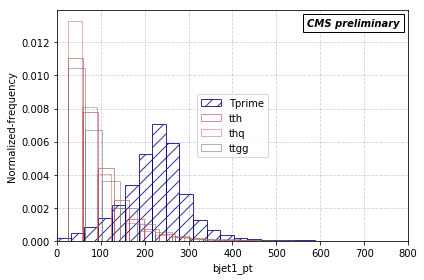

In [52]:
#plot for all
from matplotlib import pyplot
k= signal['dipho_pt']
kb_1 = backgr_1['bjet1_pt']
kb_2 = backgr_2['bjet1_pt']
kb_3 = backgr_3['bjet1_pt']
plt.hist(k, bins=40, alpha = 0.8,color='b', label='Tprime', density= True, fill= False, edgecolor='navy',hatch='//')
plt.hist(kb_1, bins=40, alpha = 0.5,color='r' ,label='tth', density= True, fill = False, edgecolor = 'brown')
plt.hist(kb_2, bins=40, alpha = 0.5,color='g' ,label='thq', density= True, fill = False, edgecolor = 'indianred')
plt.hist(kb_3, bins=40, alpha = 0.5,color='teal' ,label='ttgg', density= True, fill = False,edgecolor = 'dimgray')
plt.xlim(0,800)
plt.legend(loc='center')
plt.grid(color = 'b', alpha = 0.2, linestyle = 'dashed')
plt.xlabel('bjet1_pt')
plt.text(570, 0.0130, 'CMS preliminary', style='oblique',weight = 'bold',
        bbox={'facecolor': 'w', 'alpha': 1 })
plt.ylabel('Normalized-frequency')
plt.tight_layout()
plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot/''variable_bjet1_pt.png')
plt.show()

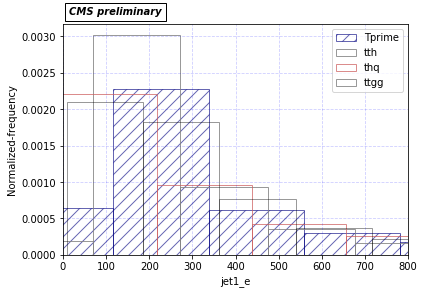

In [51]:
#plot for all
from matplotlib import pyplot
k= signal['jet1_e']
kb_1 = backgr_1['jet1_e']
kb_2 = backgr_2['jet1_e']
kb_3 = backgr_3['jet1_e']
plt.hist(k, bins=40, alpha = 0.6,color='b', label='Tprime', density= True, fill= False,edgecolor='navy',hatch='//')
plt.hist(kb_1, bins=40, alpha = 0.8,color='r' ,label='tth', density= True, fill = False, edgecolor = 'gray')
plt.hist(kb_2, bins=40, alpha = 0.7,color='g' ,label='thq', density= True, fill = False, edgecolor = 'indianred')
plt.hist(kb_3, bins=40, alpha = 0.4,color='teal' ,label='ttgg', density= True, fill = False,edgecolor = 'black')
plt.xlim(0,800)
plt.legend(loc='upper right')
plt.grid(color = 'b', alpha = 0.2, linestyle = 'dashed')
plt.xlabel('jet1_e')
plt.text(15, 0.0033, 'CMS preliminary', style='oblique',weight = 'bold',
        bbox={'facecolor': 'w', 'alpha': 1 })
plt.ylabel('Normalized-frequency')
plt.tight_layout()
plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot/''variable_jet1_e.png')
plt.show()

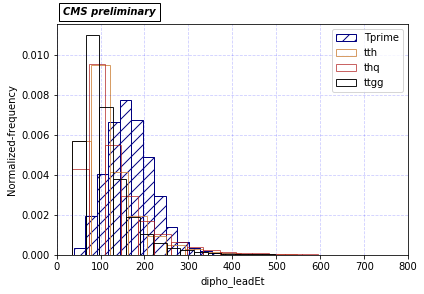

In [23]:
#plot for all
from matplotlib import pyplot
k= signal['dipho_leadEt']
kb_1 = backgr_1['dipho_leadEt']
kb_2 = backgr_2['dipho_leadEt']
kb_3 = backgr_3['dipho_leadEt']
plt.hist(k, bins=40, alpha = 1,color='b', label='Tprime', density= True, fill= False, edgecolor='navy',hatch='//')
plt.hist(kb_1, bins=40, alpha = 0.8,color='r' ,label='tth', density= True, fill = False, edgecolor = 'peru')
plt.hist(kb_2, bins=40, alpha = 0.7,color='g' ,label='thq', density= True, fill = False, edgecolor = 'firebrick')
plt.hist(kb_3, bins=40, alpha = 0.9,color='teal' ,label='ttgg', density= True, fill = False,edgecolor = 'black')
plt.xlim(0,800)
plt.legend(loc='upper right')
plt.grid(color = 'b', alpha = 0.2, linestyle = 'dashed')
plt.xlabel('dipho_leadEt')
plt.text(15, 0.012, 'CMS preliminary', style='oblique',weight = 'bold',
        bbox={'facecolor': 'w', 'alpha': 1 })
plt.ylabel('Normalized-frequency')
plt.tight_layout()
plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot/''variable_Dipho_leadEta.png')
plt.show()

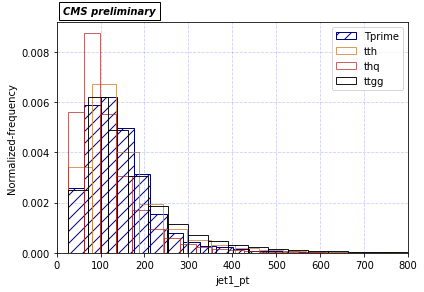

In [68]:
#plot for all
from matplotlib import pyplot
k= signal['jet1_pt']
kb_1 = backgr_1['jet1_pt']
kb_2 = backgr_2['jet1_pt']
kb_3 = backgr_3['jet1_pt']
plt.hist(k, bins=40, alpha = 1,color='b', label='Tprime', density= True, fill= False, edgecolor='navy',hatch='//')
plt.hist(kb_1, bins=40, alpha = 0.8,color='r' ,label='tth', density= True, fill = False, edgecolor = 'peru')
plt.hist(kb_2, bins=40, alpha = 0.7,color='g' ,label='thq', density= True, fill = False, edgecolor = 'firebrick')
plt.hist(kb_3, bins=40, alpha = 0.9,color='teal' ,label='ttgg', density= True, fill = False,edgecolor = 'black')
plt.xlim(0,800)
plt.legend(loc='upper right')
plt.grid(color = 'b', alpha = 0.2, linestyle = 'dashed')
plt.xlabel('jet1_pt')
plt.text(15, 0.0095, 'CMS preliminary', style='oblique',weight = 'bold',
        bbox={'facecolor': 'w', 'alpha': 1 })
plt.ylabel('Normalized-frequency')
plt.tight_layout()
plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot/''jet1_pt.png')
plt.show()

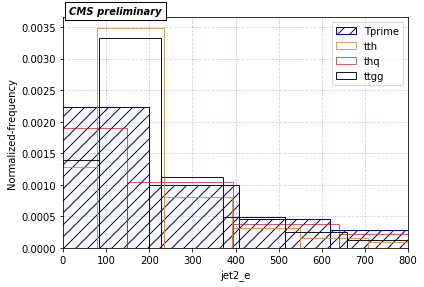

In [60]:
#plot for all
from matplotlib import pyplot
k= signal['jet2_e']
kb_1 = backgr_1['jet2_e']
kb_2 = backgr_2['jet2_e']
kb_3 = backgr_3['jet2_e']
plt.hist(k, bins=40, alpha = 1,color='b', label='Tprime', density= True, fill= False, edgecolor='navy',hatch='//')
plt.hist(kb_1, bins=40, alpha = 0.8,color='r' ,label='tth', density= True, fill = False, edgecolor = 'peru')
plt.hist(kb_2, bins=40, alpha = 0.7,color='g' ,label='thq', density= True, fill = False, edgecolor = 'firebrick')
plt.hist(kb_3, bins=40, alpha = 0.9,color='teal' ,label='ttgg', density= True, fill = False,edgecolor = 'black')
plt.xlim(0,800)
plt.legend(loc='upper right')
plt.grid(color = 'b', alpha = 0.2, linestyle = 'dashed')
plt.xlabel('jet2_e')
plt.text(15, 0.0037, 'CMS preliminary', style='oblique',weight = 'bold',
        bbox={'facecolor': 'w', 'alpha': 1 })
plt.ylabel('Normalized-frequency')
plt.tight_layout()
plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot/''jet2_e.png')
plt.show()

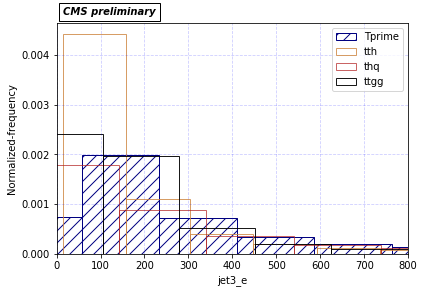

In [65]:
#plot for all
from matplotlib import pyplot
k= signal['jet3_e']
kb_1 = backgr_1['jet3_e']
kb_2 = backgr_2['jet3_e']
kb_3 = backgr_3['jet3_e']
plt.hist(k, bins=40, alpha = 1,color='b', label='Tprime', density= True, fill= False, edgecolor='navy',hatch='//')
plt.hist(kb_1, bins=40, alpha = 0.8,color='r' ,label='tth', density= True, fill = False, edgecolor = 'peru')
plt.hist(kb_2, bins=40, alpha = 0.7,color='g' ,label='thq', density= True, fill = False, edgecolor = 'firebrick')
plt.hist(kb_3, bins=40, alpha = 0.9,color='teal' ,label='ttgg', density= True, fill = False,edgecolor = 'black')
plt.xlim(0,800)
plt.legend(loc='upper right')
plt.grid(color = 'b', alpha = 0.2, linestyle = 'dashed')
plt.xlabel('jet3_e')
plt.text(15, 0.0048, 'CMS preliminary', style='oblique',weight = 'bold',
        bbox={'facecolor': 'w', 'alpha': 1 })
plt.ylabel('Normalized-frequency')
plt.tight_layout()
plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot/''jet3_e.png')
plt.show()

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ValueError: color kwarg must have one color per dataset

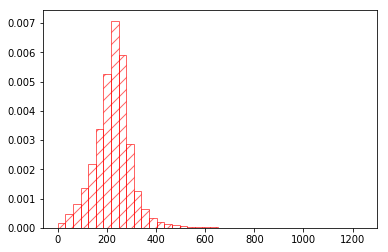

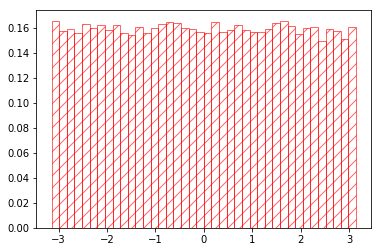

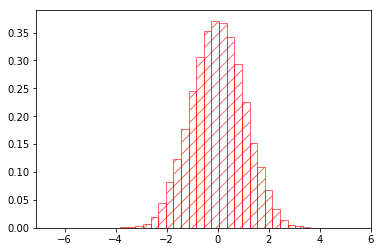

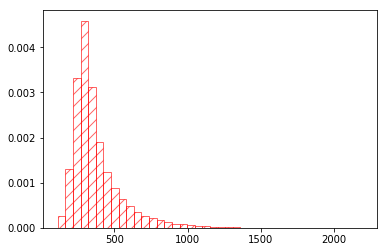

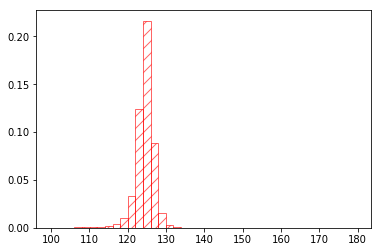

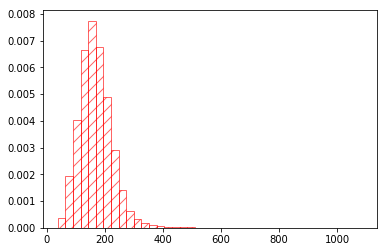

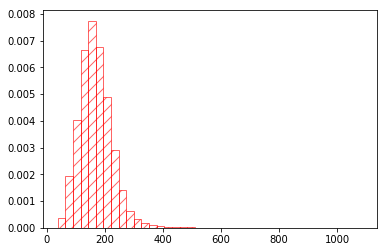

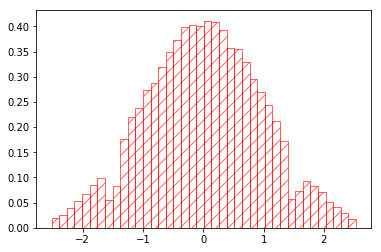

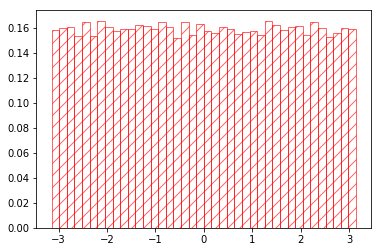

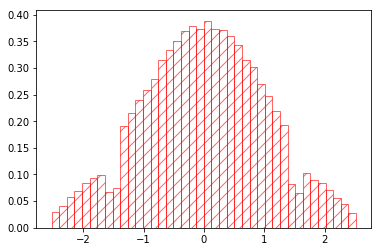

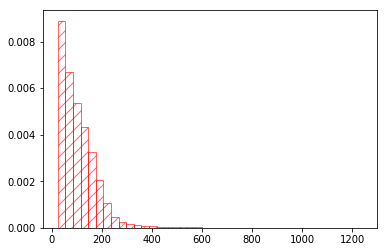

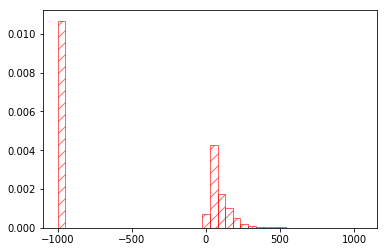

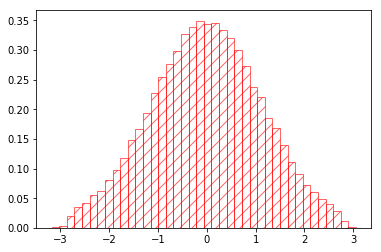

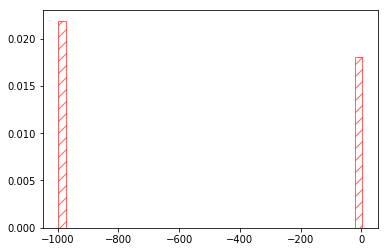

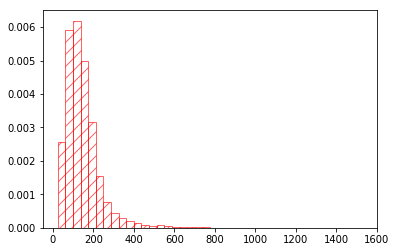

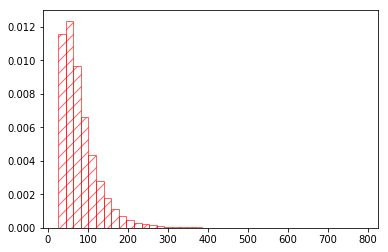

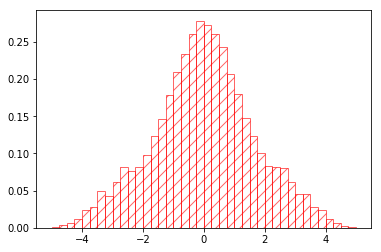

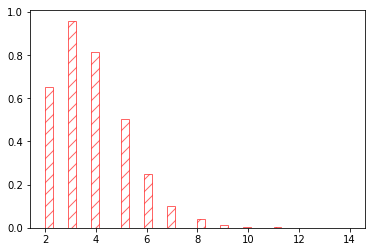

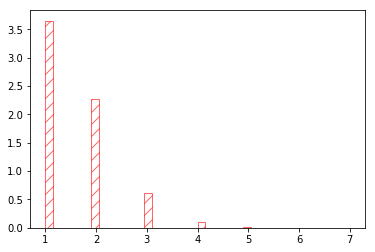

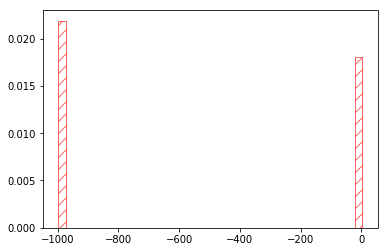

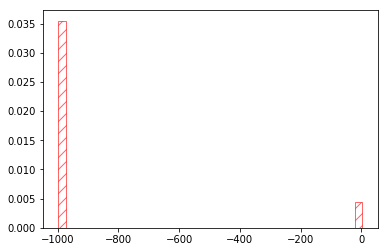

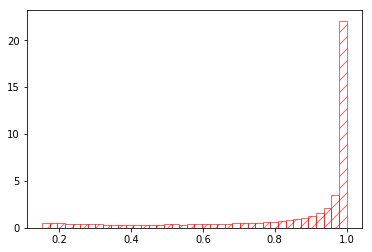

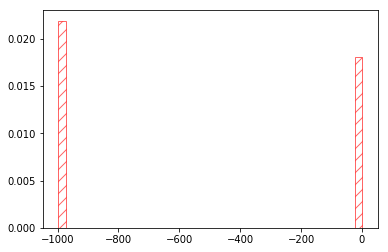

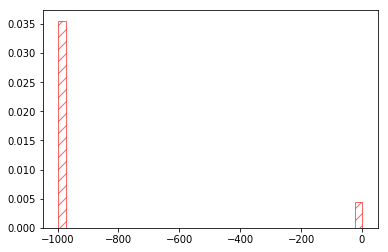

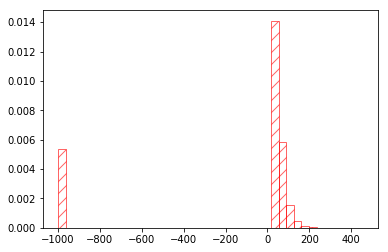

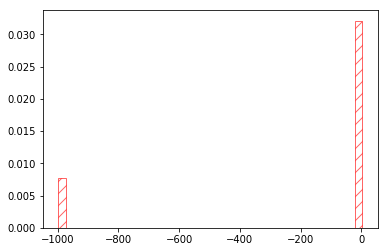

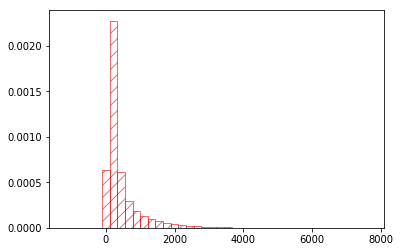

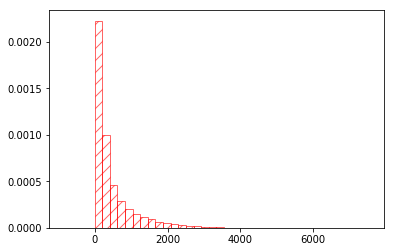

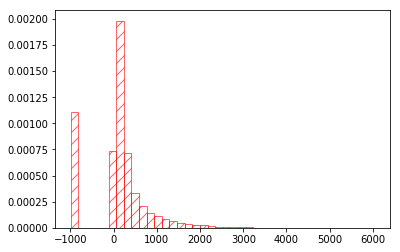

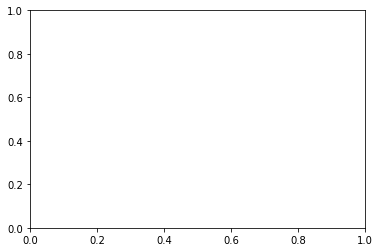

In [13]:
for i in signal.columns:
    plt.figure()
    plt.hist(signal[i],bins=40, alpha = 0.6,color='b', label='Tprime', density= True, fill= False, edgecolor='r',hatch='//')

for j in backgr_1.columns:
    plt.figure()
    plt.hist(backgr_1, bins=40, alpha = 0.8,color='r' ,label='tth', density= True, fill = False, edgecolor = 'blue', hatch = 'X')

for k in backgr_2.columns:
    plt.figure()
    plt.hist(backgr_2, bins=40, alpha = 0.8,color='g' ,label='thq', density= True, fill = False, edgecolor = 'green', hatch = '**')

for l in backgr_3.columns:
    plt.figure()
    plt.hist(backgr_3, bins=40, alpha = 0.8,color='teal' ,label='ttgg', density= True, fill = False, edgecolor = 'cyan', hatch = '++')
plt.xlim(0,800)
plt.legend(loc='upper right')
plt.grid(color = 'b', alpha = 0.2, linestyle = 'dashed')
plt.xlabel('dipho_leadEt')
plt.text(15, 0.012, 'CMS preliminary', style='oblique',weight = 'bold',
        bbox={'facecolor': 'w', 'alpha': 1 })
plt.ylabel('Normalized-frequency')
plt.tight_layout()
# plt.savefig('variable_Dipho_pt.png')
plt.show()
            

In [ ]:
plt.hist(signal,bins=40, alpha = 1)
plt.plot(subplots=True)


In [ ]:
print([f for f in signal.columns])
print([f for f in backgr_3.columns])
print([f for f in backgr_1.columns])
print([f for f in backgr_2.columns])

In [ ]:
signal.head()

In [ ]:
backgr.head()

In [ ]:
# #Run this cell only once, if you want to run this cell again then you 
# #need to clear all the outputs, as the 
# backgr_1.insert(29, "value_1", -1)
# backgr_2.insert(29, "value_2", -2)
# backgr_3.insert(29, "value_3", -3)



In [ ]:
#create dummies variable columns


Another method to add value to the particular column 
https://towardsdatascience.com/4-methods-for-adding-columns-to-pandas-dataframes-dd0696863c16  

https://www.geeksforgeeks.org/python-pandas-dataframe-add/

https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

In [ ]:
##Define X and y from the given files
X = np.concatenate((signal, backgr_1, backgr_2, backgr_3),axis =0)
Y = np.concatenate((np.ones(signal.shape[0]),
                    np.zeros(backgr_1.shape[30]),
                   np.zeros(backgr_2.shape[30]),
                   np.zeros(backgr_3.shape[30])))


https://towardsdatascience.com/machine-learning-word-embedding-sentiment-classification-using-keras-b83c28087456

https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a

https://colab.research.google.com/github/GilesStrong/lumin/blob/v0.8.0/examples/Multiclass_Classification_Signal_versus_Backgrounds.ipynb#scrollTo=FYLbSzJyw-uo

https://root.cern/doc/master/ClassificationKeras_8py.html

https://colab.research.google.com/github/GilesStrong/lumin/blob/v0.8.0/examples/Binary_Classification_Signal_versus_Background.ipynb#scrollTo=MyMg0Ppiv9AK

https://www.youtube.com/watch?v=keDWQKHCa2o

https://indico.cern.ch/event/766872/timetable/?view=standard#29-lumin-a-deep-learning-and-d

https://github.com/GilesStrong/lumin

https://github.com/raj2022/M.Sc.-thesis/blob/main/multiclass_classification/training_utils.py

https://machinelearningmastery.com/multi-label-classification-with-deep-learning/

In [ ]:
from sklearn.datasets import make_multilabel_classification